In [29]:
!pip install pandas matplotlib seaborn stellar-sdk tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 387.3 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/olivmath/.pyenv/versions/3.10.5/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
# @title Setup
import pandas as pd
from stellar_sdk import Server
from stellar_sdk import Keypair, SorobanServer

# Inicialize o servidor Horizon para cada rede
horizon_server = Server("https://horizon.stellar.org")
soroban_server = SorobanServer(server_url=" https://mainnet.sorobanrpc.com")

# Set up sender account and servers
PRIVATE_KEY = ""
sender_keypair = Keypair.from_secret(PRIVATE_KEY)
sender_account = soroban_server.load_account(sender_keypair.public_key)


df = pd.read_csv("./dev30k-04.csv")

df.head()
df = df.rename(
    columns={
        "Carimbo de data/hora": "submission_datetime",
        "Qual sua Chave Pública?": "account_id",
        "ID do Contrato": "contract_id",
        "Hash do Deploy do Contrato": "deploy_tx_hash",
    }
)

In [3]:
df

,Unnamed: 0,submission_datetime,account_id,contract_id,deploy_tx_hash
0,0,18/11/2024 20:10:49,GBPTLZBA5AO5LM7LZZBU6G2DBULROCCFBHDQWGUFJ2YBUM...,CBGR6X7ABCDMEQ5YNQYACKMORMVM6B3FLAC7STAJKKLLFG...,efcba7683d4c268b4eccea618b835987533c53c5fa2b46...
1,1,18/11/2024 20:11:13,GB5UBWORACGMEHWLBN4CQMTOGPALCSOXTQLX4K7HU3SQE4...,CDUOQ5R63VI4RUAAXVJVTSYQJZTSWBGJ4LAVAZMJAEMYP6...,fb70108ca6ef7149708ce9229d7c6d02905c47ece72438...
2,2,18/11/2024 20:11:19,GCBSD5LCZLKWF7L7ADHTBZAIA7NQQMTUDXFQ5LNNWCIVPJ...,CD4DJG6ZT7SZLVR4TFJBREFBYMKHPN4OXYLWLDNEVWY7T6...,832f94592f2a847edca4e5cbe2a2b18fc057dee5ee3cd3...
3,3,18/11/2024 20:11:29,GCYQ6P5MPT6O56GQBHDCV7NCOURN6TT5M7DKYMK737ZDT5...,CDKNWX44ZPZ7DACEWWAHIG55P6TSMR2HFRPUAYJNNEGHEH...,9408f7510acf70c94db0739fcae50849881f23d13f0997...
4,4,18/11/2024 20:11:52,GD7D2Z6LQ5F7FDLDVCKPSGNXS6REDF3ABPM2ADKIZN4PIB...,CBFDTG72GBQE37QWWTX3Y7IO7JVMYFFY4OHOTFOONON2ME...,5ca743ce9051ca82ce64b0fbca5cbdb462ce03afb76848...
5,5,18/11/2024 20:12:09,GA4WYK5DJRMVFYYC7XJQJHTJSWDESEXTTATXCUF2OQZ2Z5...,CDXXL54A64XYSCBTHZM5N5VNCTXJSPEYCKM3PYXUSLOWHY...,57e6ff00aebe19c523279fb373488945a792b92650a5f5...
6,6,18/11/2024 20:12:44,GBGIIFSLVKS2Z4XORQMOT5GV5JBTI3APQCXFNNDJ6T3U3G...,CAUDNYAIDYFBXX3O4UUAIJBPR7HCRLL3GCP6QEHO7F7WJO...,8a9e2243178525d91ddedb1a6ff96ea56379ef62e357e2...
7,7,18/11/2024 20:12:53,GBB6IIYOJ3QHN246XTDF2ZZ2Q7JPSOJLKED6IZJD6XBEUN...,CACM3GWDU77CG67CN4TUPTRJDTRCU32NS4SEBEBNPRFWMV...,470eb21eb81bd965eb04ffdf397bbf58a6dabc716ff3ed...
8,8,18/11/2024 20:12:53,GDEE7QQXP2UU42HLLE4Y3IXNYC6LG674UKK2IUBIFYBOJM...,CD5FO2RYPDVDHBTSJ3HTG2RJERSTTSGZF4AUYHKPDZUBZ5...,05d8bff658cfa74ea2b8b95f7be2b5375c1e12e1649283...
9,9,18/11/2024 20:13:12,GBBIVZN5N7EMYMQHZL4ME64GWDM5REJDLFBDET7KLIIA6G...,CC5HVG3OGJX5N75WZMXGVNQEH7NPQ5S2UYBKRTBGZGDT5Q...,5d4fa61dbb48bf1590f158e324370cc062387bb6d61d2f...


# Analise dos Dados


In [4]:
# @title Get deploy datetime

import pandas as pd


# Função para buscar o timestamp de criação do contrato e o tipo de operação
def get_operation_details(transaction_hash, account_id):
    ops = {}
    try:
        # Obtenha todas as operações associadas à transação
        ops = (
            horizon_server.operations()
            .for_transaction(transaction_hash)
            .call()["_embedded"]["records"]
        )
    except Exception as e:
        print(f"🚨 Error fetching operation details for {transaction_hash}: {str(e)}")
        return None, None
    for op in ops:
        # Verifique se a operação é feita pela account_id
        is_correct_account = account_id == op.get("source_account", False)
        if is_correct_account:
            # Retorne o timestamp e o tipo de operação
            return op["created_at"], op.get("type", "Unknown")
    print(
        f"⚠️ No matching operation found for {transaction_hash} and account {account_id}"
    )
    return None, None


# Função para processar cada DataFrame (mainnet e testnet)
def process_deploy_details(df):
    deploy_timestamps = []
    operation_types = []

    for _, row in df.iterrows():
        timestamp, op_type = get_operation_details(
            row["deploy_tx_hash"], row["account_id"]
        )
        deploy_timestamps.append(timestamp)
        operation_types.append(op_type)

    # Adiciona as colunas ao DataFrame
    df["deploy_timestamp"] = pd.to_datetime(deploy_timestamps)
    df["op_type"] = operation_types
    return df


# Processar os DataFrames mainnet e testnet
df = process_deploy_details(df)

🚨 Error fetching operation details for 1345fedc0296f30d5d629f1a5023721a9ba92da86ebaae323d293bb1003f265a: <Response [status_code=404, text={
  "type": "https://stellar.org/horizon-errors/not_found",
  "title": "Resource Missing",
  "status": 404,
  "detail": "The resource at the url requested was not found.  This usually occurs for one of two reasons:  The url requested is not valid, or no data in our database could be found with the parameters provided."
}, headers={'Date': 'Fri, 22 Nov 2024 19:58:50 GMT', 'Content-Type': 'application/problem+json; charset=utf-8', 'Content-Length': '322', 'Connection': 'keep-alive', 'Cache-Control': 'no-cache, no-store, max-age=0', 'Vary': 'Origin'}, url=https://horizon.stellar.org/transactions/1345fedc0296f30d5d629f1a5023721a9ba92da86ebaae323d293bb1003f265a/operations]>
🚨 Error fetching operation details for 5d34e7d64a95c4c9d23140de8459581345858edfa1045b3157ae6241034dedeb: <Response [status_code=404, text={
  "type": "https://stellar.org/horizon-error

In [5]:
df

,Unnamed: 0,submission_datetime,account_id,contract_id,deploy_tx_hash,deploy_timestamp,op_type
0,0,18/11/2024 20:10:49,GBPTLZBA5AO5LM7LZZBU6G2DBULROCCFBHDQWGUFJ2YBUM...,CBGR6X7ABCDMEQ5YNQYACKMORMVM6B3FLAC7STAJKKLLFG...,efcba7683d4c268b4eccea618b835987533c53c5fa2b46...,2024-11-18 19:35:19+00:00,invoke_host_function
1,1,18/11/2024 20:11:13,GB5UBWORACGMEHWLBN4CQMTOGPALCSOXTQLX4K7HU3SQE4...,CDUOQ5R63VI4RUAAXVJVTSYQJZTSWBGJ4LAVAZMJAEMYP6...,fb70108ca6ef7149708ce9229d7c6d02905c47ece72438...,2024-11-17 21:41:17+00:00,invoke_host_function
2,2,18/11/2024 20:11:19,GCBSD5LCZLKWF7L7ADHTBZAIA7NQQMTUDXFQ5LNNWCIVPJ...,CD4DJG6ZT7SZLVR4TFJBREFBYMKHPN4OXYLWLDNEVWY7T6...,832f94592f2a847edca4e5cbe2a2b18fc057dee5ee3cd3...,2024-11-18 15:30:59+00:00,invoke_host_function
3,3,18/11/2024 20:11:29,GCYQ6P5MPT6O56GQBHDCV7NCOURN6TT5M7DKYMK737ZDT5...,CDKNWX44ZPZ7DACEWWAHIG55P6TSMR2HFRPUAYJNNEGHEH...,9408f7510acf70c94db0739fcae50849881f23d13f0997...,2024-11-17 19:58:32+00:00,invoke_host_function
4,4,18/11/2024 20:11:52,GD7D2Z6LQ5F7FDLDVCKPSGNXS6REDF3ABPM2ADKIZN4PIB...,CBFDTG72GBQE37QWWTX3Y7IO7JVMYFFY4OHOTFOONON2ME...,5ca743ce9051ca82ce64b0fbca5cbdb462ce03afb76848...,2024-11-17 21:43:55+00:00,invoke_host_function
5,5,18/11/2024 20:12:09,GA4WYK5DJRMVFYYC7XJQJHTJSWDESEXTTATXCUF2OQZ2Z5...,CDXXL54A64XYSCBTHZM5N5VNCTXJSPEYCKM3PYXUSLOWHY...,57e6ff00aebe19c523279fb373488945a792b92650a5f5...,2024-11-18 22:33:48+00:00,invoke_host_function
6,6,18/11/2024 20:12:44,GBGIIFSLVKS2Z4XORQMOT5GV5JBTI3APQCXFNNDJ6T3U3G...,CAUDNYAIDYFBXX3O4UUAIJBPR7HCRLL3GCP6QEHO7F7WJO...,8a9e2243178525d91ddedb1a6ff96ea56379ef62e357e2...,2024-11-18 22:05:52+00:00,invoke_host_function
7,7,18/11/2024 20:12:53,GBB6IIYOJ3QHN246XTDF2ZZ2Q7JPSOJLKED6IZJD6XBEUN...,CACM3GWDU77CG67CN4TUPTRJDTRCU32NS4SEBEBNPRFWMV...,470eb21eb81bd965eb04ffdf397bbf58a6dabc716ff3ed...,2024-11-18 21:34:52+00:00,invoke_host_function
8,8,18/11/2024 20:12:53,GDEE7QQXP2UU42HLLE4Y3IXNYC6LG674UKK2IUBIFYBOJM...,CD5FO2RYPDVDHBTSJ3HTG2RJERSTTSGZF4AUYHKPDZUBZ5...,05d8bff658cfa74ea2b8b95f7be2b5375c1e12e1649283...,2024-11-18 20:00:45+00:00,invoke_host_function
9,9,18/11/2024 20:13:12,GBBIVZN5N7EMYMQHZL4ME64GWDM5REJDLFBDET7KLIIA6G...,CC5HVG3OGJX5N75WZMXGVNQEH7NPQ5S2UYBKRTBGZGDT5Q...,5d4fa61dbb48bf1590f158e324370cc062387bb6d61d2f...,2024-11-18 17:33:21+00:00,invoke_host_function


In [6]:
# @title Clean Data

# Remove linhas onde op_type não é 'invoke_host_function'
df = df[df["op_type"] == "invoke_host_function"]

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/2711502432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deploy_timestamp'] = pd.to_datetime(df['deploy_timestamp'])
/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/2711502432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deploy_date'] = df['deploy_timestamp'].dt.date


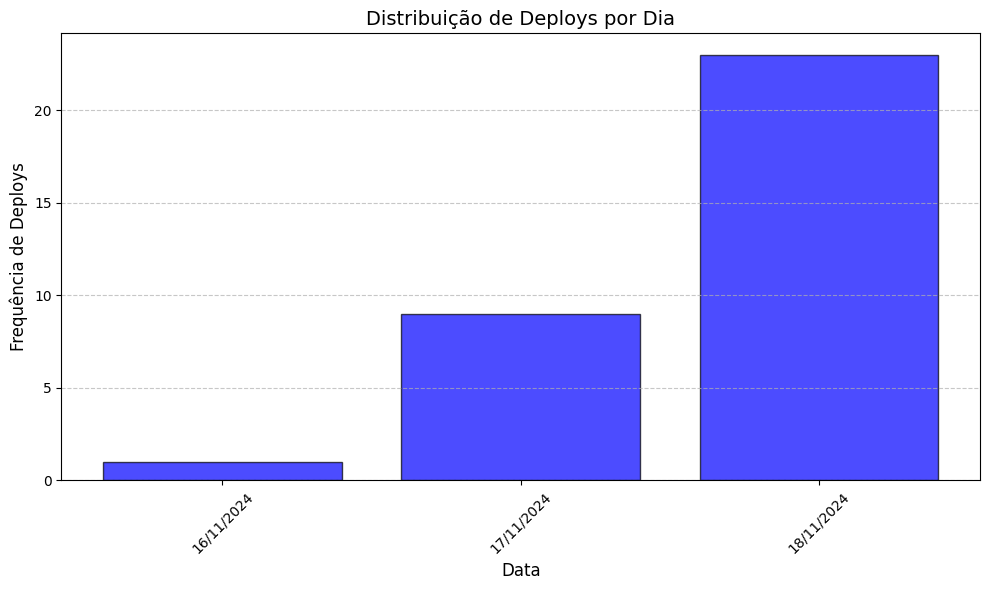

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Converta a coluna 'deploy_timestamp' para datetime, se necessário
df["deploy_timestamp"] = pd.to_datetime(df["deploy_timestamp"])

# Agrupe os dados por dia
df["deploy_date"] = df["deploy_timestamp"].dt.date

# Ordenar os dados por data
deploy_counts = df["deploy_date"].value_counts().sort_index()

# Criação do histograma
plt.figure(figsize=(10, 6))
plt.bar(
    deploy_counts.index,
    deploy_counts.values,
    color="blue",
    edgecolor="black",
    alpha=0.7,
)

# Configurações do gráfico
plt.title("Distribuição de Deploys por Dia", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Frequência de Deploys", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Formatando as datas no eixo x
formatted_dates = [date.strftime("%d/%m/%Y") for date in deploy_counts.index]
plt.xticks(deploy_counts.index, formatted_dates, rotation=45, fontsize=10)

# Exibição do gráfico
plt.tight_layout()
plt.show()

progress: 32 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 65 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 99 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 131 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 164 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 198 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 230 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 263 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 296 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 330 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 363 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


progress: 395 / 396

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/3957770766.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)


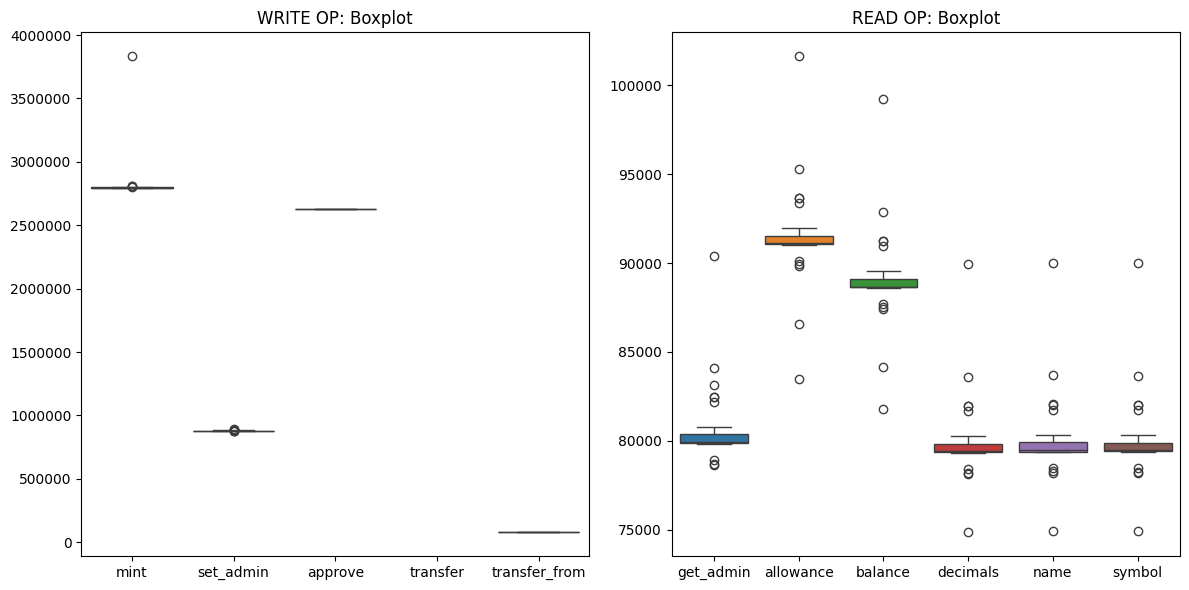

In [20]:
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from stellar_sdk import Network, TransactionBuilder, scval


# Função para simular chamadas de contrato
def simulate_function(contract_id, function_name, args):
    tx = (
        TransactionBuilder(sender_account, Network.PUBLIC_NETWORK_PASSPHRASE)
        .set_timeout(300)
        .append_invoke_contract_function_op(
            contract_id=contract_id,
            function_name=function_name,
            parameters=args,
        )
        .build()
    )

    return soroban_server.simulate_transaction(tx).min_resource_fee


# Configurações do contrato
functions = [
    ("get_admin", []),
    ("initialize", [scval.to_address(sender_keypair.public_key)]),
    ("mint", [scval.to_address(sender_keypair.public_key), scval.to_int128(1000)]),
    ("set_admin", [scval.to_address(sender_keypair.public_key)]),
    (
        "allowance",
        [
            scval.to_address(sender_keypair.public_key),
            scval.to_address(sender_keypair.public_key),
        ],
    ),
    (
        "approve",
        [
            scval.to_address(sender_keypair.public_key),
            scval.to_address(sender_keypair.public_key),
            scval.to_int128(1000),
            scval.to_uint32(123456),
        ],
    ),
    ("balance", [scval.to_address(sender_keypair.public_key)]),
    (
        "transfer",
        [
            scval.to_address(sender_keypair.public_key),
            scval.to_address(sender_keypair.public_key),
            scval.to_int128(500),
        ],
    ),
    (
        "transfer_from",
        [
            scval.to_address(sender_keypair.public_key),
            scval.to_address(sender_keypair.public_key),
            scval.to_address(sender_keypair.public_key),
            scval.to_int128(500),
        ],
    ),
    ("decimals", []),
    ("name", []),
    ("symbol", []),
]

# Simulação de chamadas e coleta de custos
costs = {}
progress_counter = 0
total_operations = len(functions) * len(df.contract_id)


def f(contract_id, func_name, args):
    global progress_counter
    print(f"\rprogress: {progress_counter} / {total_operations}", end="")
    progress_counter += 1
    try:
        return simulate_function(contract_id, func_name, args)
    except Exception as e:
        print(f"FUNC: {func_name}, ARGS: {args}", e)
        return f"Erro: {e}"


for func_name, args in functions:
    df[func_name] = df.apply(lambda row: f(row["contract_id"], func_name, args), axis=1)

# Visualização dos resultados
write_ops = [
    "mint",
    "set_admin",
    "approve",
    "transfer",
    "transfer_from",
]
read_ops = ["get_admin", "allowance", "balance", "decimals", "name", "symbol"]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[write_ops])
plt.title("WRITE OP: Boxplot")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))

plt.subplot(1, 2, 2)
sns.boxplot(data=df[read_ops])
plt.title("READ OP: Boxplot")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))

plt.tight_layout()
plt.show()

In [23]:
df

,Unnamed: 0,submission_datetime,account_id,contract_id,deploy_tx_hash,deploy_timestamp,op_type,deploy_date,get_admin,initialize,mint,set_admin,allowance,approve,balance,transfer,transfer_from,decimals,name,symbol
0,0,18/11/2024 20:10:49,GBPTLZBA5AO5LM7LZZBU6G2DBULROCCFBHDQWGUFJ2YBUM...,CBGR6X7ABCDMEQ5YNQYACKMORMVM6B3FLAC7STAJKKLLFG...,efcba7683d4c268b4eccea618b835987533c53c5fa2b46...,2024-11-18 19:35:19+00:00,invoke_host_function,2024-11-18,79898.0,80270.0,2796967.0,880373.0,91107.0,NaN,88680.0,None,NaN,79409.0,79476.0,79456.0
1,1,18/11/2024 20:11:13,GB5UBWORACGMEHWLBN4CQMTOGPALCSOXTQLX4K7HU3SQE4...,CDUOQ5R63VI4RUAAXVJVTSYQJZTSWBGJ4LAVAZMJAEMYP6...,fb70108ca6ef7149708ce9229d7c6d02905c47ece72438...,2024-11-17 21:41:17+00:00,invoke_host_function,2024-11-17,83164.0,2063465.0,NaN,NaN,86561.0,NaN,84135.0,None,77633.0,74860.0,74933.0,74913.0
2,2,18/11/2024 20:11:19,GCBSD5LCZLKWF7L7ADHTBZAIA7NQQMTUDXFQ5LNNWCIVPJ...,CD4DJG6ZT7SZLVR4TFJBREFBYMKHPN4OXYLWLDNEVWY7T6...,832f94592f2a847edca4e5cbe2a2b18fc057dee5ee3cd3...,2024-11-18 15:30:59+00:00,invoke_host_function,2024-11-18,NaN,NaN,NaN,NaN,83494.0,2629974.0,81800.0,None,NaN,NaN,NaN,NaN
3,3,18/11/2024 20:11:29,GCYQ6P5MPT6O56GQBHDCV7NCOURN6TT5M7DKYMK737ZDT5...,CDKNWX44ZPZ7DACEWWAHIG55P6TSMR2HFRPUAYJNNEGHEH...,9408f7510acf70c94db0739fcae50849881f23d13f0997...,2024-11-17 19:58:32+00:00,invoke_host_function,2024-11-17,78719.0,NaN,2795785.0,877889.0,89929.0,NaN,87502.0,None,NaN,78210.0,78328.0,78264.0
4,4,18/11/2024 20:11:52,GD7D2Z6LQ5F7FDLDVCKPSGNXS6REDF3ABPM2ADKIZN4PIB...,CBFDTG72GBQE37QWWTX3Y7IO7JVMYFFY4OHOTFOONON2ME...,5ca743ce9051ca82ce64b0fbca5cbdb462ce03afb76848...,2024-11-17 21:43:55+00:00,invoke_host_function,2024-11-17,78922.0,79319.0,2795980.0,879348.0,90131.0,NaN,87702.0,None,NaN,78434.0,78457.0,78482.0
5,5,18/11/2024 20:12:09,GA4WYK5DJRMVFYYC7XJQJHTJSWDESEXTTATXCUF2OQZ2Z5...,CDXXL54A64XYSCBTHZM5N5VNCTXJSPEYCKM3PYXUSLOWHY...,57e6ff00aebe19c523279fb373488945a792b92650a5f5...,2024-11-18 22:33:48+00:00,invoke_host_function,2024-11-18,80307.0,NaN,2797376.0,880781.0,91516.0,NaN,89089.0,None,NaN,79817.0,79885.0,79865.0
6,6,18/11/2024 20:12:44,GBGIIFSLVKS2Z4XORQMOT5GV5JBTI3APQCXFNNDJ6T3U3G...,CAUDNYAIDYFBXX3O4UUAIJBPR7HCRLL3GCP6QEHO7F7WJO...,8a9e2243178525d91ddedb1a6ff96ea56379ef62e357e2...,2024-11-18 22:05:52+00:00,invoke_host_function,2024-11-18,80029.0,82377.0,2797098.0,880503.0,91238.0,NaN,88811.0,None,NaN,79539.0,79607.0,79587.0
7,7,18/11/2024 20:12:53,GBB6IIYOJ3QHN246XTDF2ZZ2Q7JPSOJLKED6IZJD6XBEUN...,CACM3GWDU77CG67CN4TUPTRJDTRCU32NS4SEBEBNPRFWMV...,470eb21eb81bd965eb04ffdf397bbf58a6dabc716ff3ed...,2024-11-18 21:34:52+00:00,invoke_host_function,2024-11-18,79812.0,NaN,2796877.0,880285.0,91021.0,NaN,88594.0,None,NaN,79324.0,79392.0,79372.0
8,8,18/11/2024 20:12:53,GDEE7QQXP2UU42HLLE4Y3IXNYC6LG674UKK2IUBIFYBOJM...,CD5FO2RYPDVDHBTSJ3HTG2RJERSTTSGZF4AUYHKPDZUBZ5...,05d8bff658cfa74ea2b8b95f7be2b5375c1e12e1649283...,2024-11-18 20:00:45+00:00,invoke_host_function,2024-11-18,79898.0,80270.0,2796967.0,880373.0,91107.0,NaN,88680.0,None,NaN,79409.0,79476.0,79456.0
9,9,18/11/2024 20:13:12,GBBIVZN5N7EMYMQHZL4ME64GWDM5REJDLFBDET7KLIIA6G...,CC5HVG3OGJX5N75WZMXGVNQEH7NPQ5S2UYBKRTBGZGDT5Q...,5d4fa61dbb48bf1590f158e324370cc062387bb6d61d2f...,2024-11-18 17:33:21+00:00,invoke_host_function,2024-11-18,79871.0,NaN,2796940.0,880345.0,91080.0,NaN,88653.0,None,NaN,79381.0,79449.0,79429.0


# Validation of Students


In [30]:
## O saldo dessa carteira deve ser maior que 43224
from stellar_sdk.soroban_rpc import SendTransactionStatus, GetTransactionStatus
from stellar_sdk.exceptions import PrepareTransactionException
from itertools import cycle
from stellar_sdk import xdr


def invoke_contract_function(contract_id, function_name, params):
    sender_account = soroban_server.load_account(sender_keypair.public_key)

    tx = (
        TransactionBuilder(sender_account, Network.PUBLIC_NETWORK_PASSPHRASE, 100)
        .set_timeout(300)
        .append_invoke_contract_function_op(
            contract_id=contract_id,
            function_name=function_name,
            parameters=params,
        )
        .build()
    )

    try:
        tx = soroban_server.prepare_transaction(tx)
    except PrepareTransactionException as e:
        print(
            "🚨 Erro antes de enviar a transação",
            "👇" * 30,
            e.simulate_transaction_response.error,
            sep="\n",
        )
        return None

    tx.sign(sender_keypair)

    # Envia a transação
    try:
        response = soroban_server.send_transaction(tx)
    except Exception as e:
        print("🚨 Erro ao enviar a transação:", e)
        return None
    if response.status == SendTransactionStatus.ERROR:
        print("🚨 Erro ao enviar a transação:", response)
        return None

    # Hash da transação para confirmar o status
    tx_hash = response.hash
    # Animação de espera e verificação de status da transação
    clocks = cycle(["|", "/", "-", "\\", "|", "/", "-", "\\"])
    while True:
        print(f"\r⏰ Esperando transação confirmar {next(clocks)}", end="")
        get_transaction_data = soroban_server.get_transaction(tx_hash)
        if get_transaction_data.status != GetTransactionStatus.NOT_FOUND:
            break

    # Limpa a linha de animação após confirmação
    print("\r" + " " * 50, end="\r")

    # Verifica o status final da transação
    if get_transaction_data.status != GetTransactionStatus.SUCCESS:
        print(f"🚨 Transação falhou: {get_transaction_data.result_xdr}")
        return None

    # Extrai e retorna o resultado
    transaction_meta = xdr.TransactionMeta.from_xdr(
        get_transaction_data.result_meta_xdr
    )
    return scval.to_native(transaction_meta.v3.soroban_meta.return_value)


from tqdm import tqdm

for index, row in tqdm(df.iterrows(), total=len(df), desc="Fetching contract info"):
    contract_id = row['contract_id']
    name = invoke_contract_function(contract_id, "name", [])
    balance = invoke_contract_function(
        contract_id, "balance", [scval.to_address("GCREO3OEYOYWU4FTSOJAEC6EY7OTSQ7H2UJZ5A7YRCYV7R7MTP3JC72U")]
    )
    df.at[index, 'name'] = name
    df.at[index, 'balance'] = balance

    print(f"Token: {name} Balance: {balance}")

Fetching contract info:   0%|          | 0/33 [00:00<?, ?it/s]

⏰ Esperando transação confirmar \                 

/var/folders/m5/cy4xqbg931z8tf2c5xhzwlvw0000gn/T/ipykernel_28165/405215222.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NRX Token' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, 'name'] = name
Fetching contract info:   3%|▎         | 1/33 [00:16<08:37, 16.17s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar -                 

Fetching contract info:   6%|▌         | 2/33 [00:27<06:59, 13.54s/it]

Token: John Galt Balance: 43224000000000000000000 
🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, InvalidAction)
DebugInfo not available

⏰ Esperando transação confirmar \

Fetching contract info:   9%|▉         | 3/33 [00:34<05:08, 10.30s/it]

Token: None Balance: 0                            
⏰ Esperando transação confirmar /                 

Fetching contract info:  12%|█▏        | 4/33 [00:45<05:05, 10.55s/it]

Token: Guanabara Token Balance: 43224000000000002097152
⏰ Esperando transação confirmar |                 

Fetching contract info:  15%|█▌        | 5/33 [00:56<05:04, 10.89s/it]

Token: JTOKEN Balance: 43224000000000000000000    
⏰ Esperando transação confirmar -                 

Fetching contract info:  18%|█▊        | 6/33 [01:08<05:00, 11.12s/it]

Token: Token NRX Balance: 43224000000000000000000 
⏰ Esperando transação confirmar /                 

Fetching contract info:  21%|██        | 7/33 [01:19<04:52, 11.27s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar |                 

Fetching contract info:  24%|██▍       | 8/33 [01:32<04:50, 11.63s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar /                 

Fetching contract info:  27%|██▋       | 9/33 [01:43<04:35, 11.50s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar /                 

Fetching contract info:  30%|███       | 10/33 [01:54<04:24, 11.50s/it]

Token: NRX Dev 30K Balance: 43224000000000000043224
⏰ Esperando transação confirmar \                 

Fetching contract info:  33%|███▎      | 11/33 [02:12<04:50, 13.22s/it]

Token: Token NRX Balance: 43224000000000000000000 
⏰ Esperando transação confirmar /                 

Fetching contract info:  36%|███▋      | 12/33 [02:25<04:41, 13.38s/it]

Token: Pillas Balance: 43224000000000000000000    
⏰ Esperando transação confirmar -                 

Fetching contract info:  39%|███▉      | 13/33 [02:39<04:27, 13.37s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar /                 

Fetching contract info:  42%|████▏     | 14/33 [02:51<04:09, 13.12s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar |                 

Fetching contract info:  45%|████▌     | 15/33 [03:04<03:52, 12.91s/it]

Token: NRX Token Balance: 43224000000000000000000 
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABQOb////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='1da0e0abd062b281f556c4e0b040a606adcb3703e6a72015809700b413324d3f' latest_ledger=54520603 latest_ledger_close_time=1732319858


Fetching contract info:  48%|████▊     | 16/33 [03:05<02:39,  9.37s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABZhr////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='39c43e92ea6b253d7b7867b71a838bd44120d36004c777d9d3a59e7765b4ceda' latest_ledger=54520603 latest_ledger_close_time=1732319858
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABNoH////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='bf54bfea285c8de0db88726fbc933a035d2609c2f950a522c62b6d8e7039b2ff' latest_ledger=54520603 latest_ledger_close_time=1732319858


Fetching contract info:  52%|█████▏    | 17/33 [03:06<01:50,  6.89s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABW+H////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='ec59223c7d536a9d57abd2fc7d893382402395ae8dea522d48560a3f7b580a7a' latest_ledger=54520603 latest_ledger_close_time=1732319858
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABP7/////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='a19db2f29c36b4ab4c94a8921e6af4ce7ae48ef9c2928ded618dcafe0fbcbf93' latest_ledger=54520603 latest_ledger_close_time=1732319858


Fetching contract info:  55%|█████▍    | 18/33 [03:07<01:17,  5.16s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABZO7////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='59c6b80f84d36825e0c5f8c20a15d08f18b01dd9fc09e2dfb75fd9386bf08f74' latest_ledger=54520603 latest_ledger_close_time=1732319858
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABNoT////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='6d87b147fc61367f580b1fb7c48e3ca6ba742ac9e6c3eee3e786140d79bec63d' latest_ledger=54520603 latest_ledger_close_time=1732319858


Fetching contract info:  58%|█████▊    | 19/33 [03:08<00:55,  3.96s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABW7T////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='5b17c148a89552f7686275cfffd58be1ca9319d141cca55e2210ac85b0e3f9a4' latest_ledger=54520603 latest_ledger_close_time=1732319858
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABN1v////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='7095dbff4aa1fc373fcd1bc85296b6dff135e994fe7e212acb3838eb0cc89640' latest_ledger=54520603 latest_ledger_close_time=1732319858


Fetching contract info:  61%|██████    | 20/33 [03:10<00:41,  3.17s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABXI7////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='b6484a22dfbf4a282bc019e1923db41176fe1640d69e24fe67d618ed278728a9' latest_ledger=54520604 latest_ledger_close_time=1732319865
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABOGn////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='a7b0dc2b3405ad45e9baaf6a3fca4ec3279f459a9a325806b702c733ba1f029a' latest_ledger=54520604 latest_ledger_close_time=1732319865


Fetching contract info:  64%|██████▎   | 21/33 [03:11<00:30,  2.56s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABXZ3////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='1eabab6ae504e864e313973512d8163604f1e99579ca58b0df704f47b647c3fd' latest_ledger=54520604 latest_ledger_close_time=1732319865
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABMeL////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='e336cccfb89b5970191f3e569fa8d028d577212d0053867a17ce3e96e58e5480' latest_ledger=54520604 latest_ledger_close_time=1732319865


Fetching contract info:  67%|██████▋   | 22/33 [03:12<00:23,  2.12s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABVwr////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='b121875ad0383ac7adbcc07fff124de173783738f99a1297c278149d9d871f32' latest_ledger=54520604 latest_ledger_close_time=1732319865
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABNtD////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='e3e0175944439903700265e38c262dab13cffaebc6d388782337e633880db263' latest_ledger=54520604 latest_ledger_close_time=1732319865


Fetching contract info:  70%|██████▉   | 23/33 [03:13<00:18,  1.84s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABXAP////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='b7c16f821a5ed3d4d975c2d0473718020ea40f162fb2842e3f541cd61ffce88d' latest_ledger=54520604 latest_ledger_close_time=1732319865
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABR0H////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='e3d8a7355c9eb21fdcb1abd124825ecde686c576f64518ab38ce31ae01d7c1e9' latest_ledger=54520604 latest_ledger_close_time=1732319865


Fetching contract info:  73%|███████▎  | 24/33 [03:14<00:14,  1.63s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABbHb////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='e1f27182318792ade097aa90f297787a6f421047eb59489d9a5867bc62b8af43' latest_ledger=54520604 latest_ledger_close_time=1732319865
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABNoH////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='9b2fab33090506a69132d73d4f05f2b13aea3b08328b93e5b9a67235cd3bc914' latest_ledger=54520604 latest_ledger_close_time=1732319865


Fetching contract info:  76%|███████▌  | 25/33 [03:15<00:12,  1.54s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABW+H////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='25942c3ae1b321c74cb2afd6f0115423773d3d45e35fdf0eac9167413fe473b4' latest_ledger=54520605 latest_ledger_close_time=1732319871
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABQMv////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='6fd6c5943fb3f9e0feade9ad9519eebf05011680324f5329d7c8a2928ca1f3f4' latest_ledger=54520605 latest_ledger_close_time=1732319871


Fetching contract info:  79%|███████▉  | 26/33 [03:17<00:09,  1.42s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABZf7////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='f6e54950152f2b224ee66b2ebf6277b2647e2cd299e8c7ad0d88bf946ff6ba53' latest_ledger=54520605 latest_ledger_close_time=1732319871
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABNoH////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='7a8eec562f66f7632ebbece9665c62e9ac897ca3dcff9bd2aa84301595b94596' latest_ledger=54520605 latest_ledger_close_time=1732319871


Fetching contract info:  82%|████████▏ | 27/33 [03:18<00:07,  1.33s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABW+H////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='70a710243eeb17c82914dea9aca48fe5931044281a7593bc6d9f0eb2553ed30a' latest_ledger=54520605 latest_ledger_close_time=1732319871
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABNq/////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='049858793d769582c7744d32016499c0b4a325cbd56e3149b51e50e8813713f0' latest_ledger=54520605 latest_ledger_close_time=1732319871


Fetching contract info:  85%|████████▍ | 28/33 [03:19<00:06,  1.27s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABW9r////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='4bbf64d1131401ef33f229d42ce9f0dcb6d98c4c549f3f12a6f7072dbccdee9b' latest_ledger=54520605 latest_ledger_close_time=1732319871
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABNr3////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='f4cf520fbfb14de044f50a464a510e0bd3a634e5d53fea9f130072b3102845f4' latest_ledger=54520605 latest_ledger_close_time=1732319871


Fetching contract info:  88%|████████▊ | 29/33 [03:20<00:04,  1.23s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABW/D////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='b160503d3079d7ec701ae0d550ef43f7fa8d41330db662b215f4dc9e46cd0d56' latest_ledger=54520605 latest_ledger_close_time=1732319871
Token: None Balance: None
🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, InvalidAction)
DebugInfo not available



Fetching contract info:  91%|█████████ | 30/33 [03:21<00:03,  1.09s/it]

🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, MissingValue)
DebugInfo not available

Token: None Balance: None
🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, InvalidAction)
DebugInfo not available



Fetching contract info:  94%|█████████▍| 31/33 [03:21<00:01,  1.02it/s]

🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, MissingValue)
DebugInfo not available

Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABOKH////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='180474f593a5dba8ecbf9282d6aa229835451f1a095b0d9b489bd0322d687b8c' latest_ledger=54520606 latest_ledger_close_time=1732319876


Fetching contract info:  97%|█████████▋| 32/33 [03:23<00:01,  1.04s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABXS/////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='8c167382c1cad7738ad836c83f46ca90461281f0b0f3c034fa77329ff4761b1c' latest_ledger=54520606 latest_ledger_close_time=1732319876
Token: None Balance: None
🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABOSj////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='9fd642297da121e71bf3e0954b2bdf2fe5d3a17c19ae2b6c2c83b4db149a0c37' latest_ledger=54520606 latest_ledger_close_time=1732319876


Fetching contract info: 100%|██████████| 33/33 [03:24<00:00,  6.19s/it]

🚨 Erro ao enviar a transação: error_result_xdr='AAAAAAABXeT////5AAAAAA==' diagnostic_events_xdr=None status=<SendTransactionStatus.ERROR: 'ERROR'> hash='a9f5f52acf5f3050b7fd21cb7fdb706436634f652511c01c213d4d1c20f3a172' latest_ledger=54520606 latest_ledger_close_time=1732319876
Token: None Balance: None


In [34]:
## O saldo dessa carteira deve ser maior que 43224
from stellar_sdk.soroban_rpc import SendTransactionStatus, GetTransactionStatus
from stellar_sdk.exceptions import PrepareTransactionException
from itertools import cycle
from stellar_sdk import xdr


def invoke_contract_function(contract_id, function_name, params):
    sender_account = soroban_server.load_account(sender_keypair.public_key)

    tx = (
        TransactionBuilder(sender_account, Network.PUBLIC_NETWORK_PASSPHRASE, 100)
        .set_timeout(300)
        .append_invoke_contract_function_op(
            contract_id=contract_id,
            function_name=function_name,
            parameters=params,
        )
        .build()
    )

    try:
        tx = soroban_server.prepare_transaction(tx)
    except PrepareTransactionException as e:
        print(
            "🚨 Erro antes de enviar a transação",
            "👇" * 30,
            e.simulate_transaction_response.error,
            sep="\n",
        )
        return None

    tx.sign(sender_keypair)

    # Envia a transação
    try:
        response = soroban_server.send_transaction(tx)
    except Exception as e:
        print("🚨 Erro ao enviar a transação:", e)
        return None
    if response.status == SendTransactionStatus.ERROR:
        print("🚨 Erro ao enviar a transação:", response)
        return None

    # Hash da transação para confirmar o status
    tx_hash = response.hash
    # Animação de espera e verificação de status da transação
    clocks = cycle(["|", "/", "-", "\\", "|", "/", "-", "\\"])
    while True:
        print(f"\r⏰ Esperando transação confirmar {next(clocks)}", end="")
        get_transaction_data = soroban_server.get_transaction(tx_hash)
        if get_transaction_data.status != GetTransactionStatus.NOT_FOUND:
            break

    # Limpa a linha de animação após confirmação
    print("\r" + " " * 50, end="\r")

    # Verifica o status final da transação
    if get_transaction_data.status != GetTransactionStatus.SUCCESS:
        print(f"🚨 Transação falhou: {get_transaction_data.result_xdr}")
        return None

    # Extrai e retorna o resultado
    transaction_meta = xdr.TransactionMeta.from_xdr(
        get_transaction_data.result_meta_xdr
    )
    return scval.to_native(transaction_meta.v3.soroban_meta.return_value)


from tqdm import tqdm
for index, row in tqdm(df.loc[15:].iterrows(), total=len(df.loc[15:]), desc="Fetching contract info"):
    contract_id = row['contract_id']
    name = invoke_contract_function(contract_id, "name", [])
    balance = invoke_contract_function(
        contract_id, "balance", [scval.to_address("GCREO3OEYOYWU4FTSOJAEC6EY7OTSQ7H2UJZ5A7YRCYV7R7MTP3JC72U")]
    )
    df.loc[index, 'name'] = name
    df.loc[index, 'balance'] = balance

    print(f"Token: {name} Balance: {balance}")

Fetching contract info:   0%|          | 0/18 [00:00<?, ?it/s]

⏰ Esperando transação confirmar |                 

Fetching contract info:   6%|▌         | 1/18 [00:18<05:19, 18.81s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar /                 

Fetching contract info:  11%|█         | 2/18 [00:30<03:53, 14.57s/it]

Token: GOLDBAR Balance: 43224000000000000000000   
⏰ Esperando transação confirmar |                 

Fetching contract info:  17%|█▋        | 3/18 [00:42<03:20, 13.39s/it]

Token: Nova Token Balance: 43224000000000000000000
⏰ Esperando transação confirmar |                 

Fetching contract info:  22%|██▏       | 4/18 [00:54<03:03, 13.08s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar /                 

Fetching contract info:  28%|██▊       | 5/18 [01:06<02:42, 12.53s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar \                 

Fetching contract info:  33%|███▎      | 6/18 [01:18<02:28, 12.34s/it]

Token: Token NRX Balance: 43224000000000000000000 
⏰ Esperando transação confirmar \                 

Fetching contract info:  39%|███▉      | 7/18 [01:30<02:15, 12.27s/it]

Token: NRX Token Balance: 43224                   
⏰ Esperando transação confirmar /                 

Fetching contract info:  44%|████▍     | 8/18 [01:43<02:03, 12.33s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar |                 

Fetching contract info:  50%|█████     | 9/18 [01:55<01:51, 12.38s/it]

Token: DEV30Kcoin Balance: 43224000000000000000000
⏰ Esperando transação confirmar |                 

Fetching contract info:  56%|█████▌    | 10/18 [02:07<01:38, 12.29s/it]

Token: SPACEX Balance: 43224000000000000000000    
⏰ Esperando transação confirmar |                 

Fetching contract info:  61%|██████    | 11/18 [02:20<01:27, 12.53s/it]

Token: NRX Token Balance: 43224000000000000000000 
⏰ Esperando transação confirmar -                 

Fetching contract info:  67%|██████▋   | 12/18 [02:35<01:19, 13.21s/it]

Token: MANIDOG Balance: 43224000000000000000000   
⏰ Esperando transação confirmar \                 

Fetching contract info:  72%|███████▏  | 13/18 [02:47<01:04, 12.81s/it]

Token: NRX Token Balance: 43224                   
⏰ Esperando transação confirmar \                 

Fetching contract info:  78%|███████▊  | 14/18 [03:03<00:54, 13.70s/it]

Token: NRX Token Balance: 43224000000000000000000 
🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, InvalidAction)
DebugInfo not available



Fetching contract info:  83%|████████▎ | 15/18 [03:04<00:29,  9.85s/it]

🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, MissingValue)
DebugInfo not available

Token: None Balance: None
🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, InvalidAction)
DebugInfo not available



Fetching contract info:  89%|████████▉ | 16/18 [03:04<00:14,  7.11s/it]

🚨 Erro antes de enviar a transação
👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇👇
HostError: Error(WasmVm, MissingValue)
DebugInfo not available

Token: None Balance: None
⏰ Esperando transação confirmar |                 

Fetching contract info:  94%|█████████▍| 17/18 [03:23<00:10, 10.72s/it]

Token: STELLAR ANDERSON TOKEN Balance: 43224000000000000000000
⏰ Esperando transação confirmar \                 

Fetching contract info: 100%|██████████| 18/18 [03:37<00:00, 12.10s/it]

Token: STELLAR MULLER TOKEN Balance: 43224000000000000000000


In [35]:
df

,Unnamed: 0,submission_datetime,account_id,contract_id,deploy_tx_hash,deploy_timestamp,op_type,deploy_date,get_admin,initialize,mint,set_admin,allowance,approve,balance,transfer,transfer_from,decimals,name,symbol
0,0,18/11/2024 20:10:49,GBPTLZBA5AO5LM7LZZBU6G2DBULROCCFBHDQWGUFJ2YBUM...,CBGR6X7ABCDMEQ5YNQYACKMORMVM6B3FLAC7STAJKKLLFG...,efcba7683d4c268b4eccea618b835987533c53c5fa2b46...,2024-11-18 19:35:19+00:00,invoke_host_function,2024-11-18,79898.0,80270.0,2796967.0,880373.0,91107.0,NaN,4.322400e+22,None,NaN,79409.0,NRX Token,79456.0
1,1,18/11/2024 20:11:13,GB5UBWORACGMEHWLBN4CQMTOGPALCSOXTQLX4K7HU3SQE4...,CDUOQ5R63VI4RUAAXVJVTSYQJZTSWBGJ4LAVAZMJAEMYP6...,fb70108ca6ef7149708ce9229d7c6d02905c47ece72438...,2024-11-17 21:41:17+00:00,invoke_host_function,2024-11-17,83164.0,2063465.0,NaN,NaN,86561.0,NaN,4.322400e+22,None,77633.0,74860.0,John Galt,74913.0
2,2,18/11/2024 20:11:19,GCBSD5LCZLKWF7L7ADHTBZAIA7NQQMTUDXFQ5LNNWCIVPJ...,CD4DJG6ZT7SZLVR4TFJBREFBYMKHPN4OXYLWLDNEVWY7T6...,832f94592f2a847edca4e5cbe2a2b18fc057dee5ee3cd3...,2024-11-18 15:30:59+00:00,invoke_host_function,2024-11-18,NaN,NaN,NaN,NaN,83494.0,2629974.0,0.000000e+00,None,NaN,NaN,None,NaN
3,3,18/11/2024 20:11:29,GCYQ6P5MPT6O56GQBHDCV7NCOURN6TT5M7DKYMK737ZDT5...,CDKNWX44ZPZ7DACEWWAHIG55P6TSMR2HFRPUAYJNNEGHEH...,9408f7510acf70c94db0739fcae50849881f23d13f0997...,2024-11-17 19:58:32+00:00,invoke_host_function,2024-11-17,78719.0,NaN,2795785.0,877889.0,89929.0,NaN,4.322400e+22,None,NaN,78210.0,Guanabara Token,78264.0
4,4,18/11/2024 20:11:52,GD7D2Z6LQ5F7FDLDVCKPSGNXS6REDF3ABPM2ADKIZN4PIB...,CBFDTG72GBQE37QWWTX3Y7IO7JVMYFFY4OHOTFOONON2ME...,5ca743ce9051ca82ce64b0fbca5cbdb462ce03afb76848...,2024-11-17 21:43:55+00:00,invoke_host_function,2024-11-17,78922.0,79319.0,2795980.0,879348.0,90131.0,NaN,4.322400e+22,None,NaN,78434.0,JTOKEN,78482.0
5,5,18/11/2024 20:12:09,GA4WYK5DJRMVFYYC7XJQJHTJSWDESEXTTATXCUF2OQZ2Z5...,CDXXL54A64XYSCBTHZM5N5VNCTXJSPEYCKM3PYXUSLOWHY...,57e6ff00aebe19c523279fb373488945a792b92650a5f5...,2024-11-18 22:33:48+00:00,invoke_host_function,2024-11-18,80307.0,NaN,2797376.0,880781.0,91516.0,NaN,4.322400e+22,None,NaN,79817.0,Token NRX,79865.0
6,6,18/11/2024 20:12:44,GBGIIFSLVKS2Z4XORQMOT5GV5JBTI3APQCXFNNDJ6T3U3G...,CAUDNYAIDYFBXX3O4UUAIJBPR7HCRLL3GCP6QEHO7F7WJO...,8a9e2243178525d91ddedb1a6ff96ea56379ef62e357e2...,2024-11-18 22:05:52+00:00,invoke_host_function,2024-11-18,80029.0,82377.0,2797098.0,880503.0,91238.0,NaN,4.322400e+22,None,NaN,79539.0,NRX Token,79587.0
7,7,18/11/2024 20:12:53,GBB6IIYOJ3QHN246XTDF2ZZ2Q7JPSOJLKED6IZJD6XBEUN...,CACM3GWDU77CG67CN4TUPTRJDTRCU32NS4SEBEBNPRFWMV...,470eb21eb81bd965eb04ffdf397bbf58a6dabc716ff3ed...,2024-11-18 21:34:52+00:00,invoke_host_function,2024-11-18,79812.0,NaN,2796877.0,880285.0,91021.0,NaN,4.322400e+22,None,NaN,79324.0,NRX Token,79372.0
8,8,18/11/2024 20:12:53,GDEE7QQXP2UU42HLLE4Y3IXNYC6LG674UKK2IUBIFYBOJM...,CD5FO2RYPDVDHBTSJ3HTG2RJERSTTSGZF4AUYHKPDZUBZ5...,05d8bff658cfa74ea2b8b95f7be2b5375c1e12e1649283...,2024-11-18 20:00:45+00:00,invoke_host_function,2024-11-18,79898.0,80270.0,2796967.0,880373.0,91107.0,NaN,4.322400e+22,None,NaN,79409.0,NRX Token,79456.0
9,9,18/11/2024 20:13:12,GBBIVZN5N7EMYMQHZL4ME64GWDM5REJDLFBDET7KLIIA6G...,CC5HVG3OGJX5N75WZMXGVNQEH7NPQ5S2UYBKRTBGZGDT5Q...,5d4fa61dbb48bf1590f158e324370cc062387bb6d61d2f...,2024-11-18 17:33:21+00:00,invoke_host_function,2024-11-18,79871.0,NaN,2796940.0,880345.0,91080.0,NaN,4.322400e+22,None,NaN,79381.0,NRX Dev 30K,79429.0


In [125]:
df

,Unnamed: 0,submission_datetime,account_id,contract_id,deploy_tx_hash,deploy_timestamp,op_type,deploy_date,get_admin,initialize,mint,set_admin,allowance,approve,balance,transfer,transfer_from,decimals,name,symbol
0,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,False,False,True,False,True,False,True,True,True,True
2,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,False,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True
5,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,False,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True
7,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,False,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True
9,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,False,False,True,True,True


In [122]:
final  = df[['contract_id', 'account_id', 'balance', 'name']]

In [123]:
final = df.notna()
final['balance'].astype(int)
final = final[final['balance'] > 43224 * 1e18]

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [127]:
backup = final

In [146]:
final = backup

In [147]:
final = final[final['balance'] >= 1]

In [150]:
list(final.account_id)

['GBPTLZBA5AO5LM7LZZBU6G2DBULROCCFBHDQWGUFJ2YBUMBZZ7EYDAJ4',
 'GB5UBWORACGMEHWLBN4CQMTOGPALCSOXTQLX4K7HU3SQE4DHKRV7GGD7',
 'GCYQ6P5MPT6O56GQBHDCV7NCOURN6TT5M7DKYMK737ZDT5XTCR52YE5V',
 'GD7D2Z6LQ5F7FDLDVCKPSGNXS6REDF3ABPM2ADKIZN4PIBWDKKQH4AS7',
 'GA4WYK5DJRMVFYYC7XJQJHTJSWDESEXTTATXCUF2OQZ2Z5UVJJRYQAZU',
 'GBGIIFSLVKS2Z4XORQMOT5GV5JBTI3APQCXFNNDJ6T3U3GHQSBMOFGX7',
 'GBB6IIYOJ3QHN246XTDF2ZZ2Q7JPSOJLKED6IZJD6XBEUNABGKEB6UIB',
 'GDEE7QQXP2UU42HLLE4Y3IXNYC6LG674UKK2IUBIFYBOJMT43VMQKSJN',
 'GBBIVZN5N7EMYMQHZL4ME64GWDM5REJDLFBDET7KLIIA6GQRQVJ2IQWE',
 'GAGL327YR6JV4WUOO6TWRXB3UYWGAAOGGZAUKAJFTJDVJT6A4PASMRMS',
 'GAFASLN5AWEKSDNXLRUH525N2FSNTBFLFG53EPUEOKRQCWUI2BLT5JES',
 'GBBZVRUFJONG6ECPQELXJIOKRH3CKFO24ESZL6ZZULBTHMFOB3OJH5IX',
 'GDZOBWMQ7UT5O6TB7VVQSBKFIZ2XF7HHZJYOZYXN74ADNFWJX4RE2CMN',
 'GAAHX4TUAJPVWFDAEYKLT52ROZMYERWSKM7ZIYKT3JZQ6JJS73HRYHRU',
 'GASBS5FHTGFFMYTYYIITOTX6A4ZG3J55BJGOTSQXCRDTIRRZBA6J63MG',
 'GDFO7IDGWQNVHI5QHVJDXYQR3T7BZOD3ZYXA65U7TAIPKF5VKSLNQZVA',
 'GANSVIA3OR537VRFFB5S3Y